# Pandas : Examples

## Reading and Writing CSV

In [1]:
import pandas as pd

students = pd.DataFrame([
    ["Donald Duck", "Copenhagen"],
    ["Goofy", "Aarhus"],
    ["Mickey Mouse", "Aarhus"]
], columns=["Name", "City"])

students.to_csv('students.csv', index=False)  # index=True (default) adds first column with index 0..2

students = pd.read_csv('students.csv')
students

,Name,City
0,Donald Duck,Copenhagen
1,Goofy,Aarhus
2,Mickey Mouse,Aarhus


# Initialize sqlite 

In [2]:
import sqlite3


countries = [('Denmark', 5748769, 42931, 'Copenhagen'),
             ('Germany', 82800000, 357168, 'Berlin'),
             ('USA', 325719178, 9833520, 'Washington, D.C.'), 
             ('Iceland', 334252, 102775, 'Reykjavik')]

cities = [('Copenhagen', 'Denmark', 775033, 800),
          ('Aarhus', 'Denmark', 273077, 750),
          ('Berlin', 'Germany', 3711930, 1237),
          ('Munich', 'Germany', 1464301, 1158),
          ('Reykjavik', 'Iceland', 126100, 874),
          ('Washington, D.C.', 'USA', 693972, 1790),
          ('New Orleans', 'USA', 343829, 1718),
          ('San Francisco', 'USA', 884363, 1776)]

connection = sqlite3.connect('example.sqlite')
c = connection.cursor()
c.executescript('''DROP TABLE IF EXISTS country;  -- multiple statements
                   DROP TABLE IF EXISTS city''')
c.execute('CREATE TABLE country (name, population, area, capital)')
c.executemany('INSERT INTO country VALUES (?,?,?,?)', countries)
c.execute('CREATE TABLE city (name, country, population, established)')
c.executemany('INSERT INTO city VALUES (?,?,?,?)', cities)

connection.commit()
connection.close()

## Loading Pandas data frames from sqlite3

In [3]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('example.sqlite')

countries = pd.read_sql_query('SELECT * FROM country', connection)
cities = pd.read_sql_query('SELECT * FROM city', connection)

students.to_sql('students', connection, if_exists='replace')

In [4]:
type(countries), type(cities), type(students)  # Pandas data frame

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [5]:
countries  # looks nice, because of Jupyter notebook integration

,name,population,area,capital
0,Denmark,5748769,42931,Copenhagen
1,Germany,82800000,357168,Berlin
2,USA,325719178,9833520,"Washington, D.C."
3,Iceland,334252,102775,Reykjavik


In [6]:
print(countries)  # does not exploit Jupyter notebook integration

      name  population     area           capital
0  Denmark     5748769    42931        Copenhagen
1  Germany    82800000   357168            Berlin
2      USA   325719178  9833520  Washington, D.C.
3  Iceland      334252   102775         Reykjavik


In [7]:
cities

,name,country,population,established
0,Copenhagen,Denmark,775033,800
1,Aarhus,Denmark,273077,750
2,Berlin,Germany,3711930,1237
3,Munich,Germany,1464301,1158
4,Reykjavik,Iceland,126100,874
5,"Washington, D.C.",USA,693972,1790
6,New Orleans,USA,343829,1718
7,San Francisco,USA,884363,1776


## Indexing data frames

In [8]:
countries['name']  # single column

0    Denmark
1    Germany
2        USA
3    Iceland
Name: name, dtype: object

In [9]:
countries.name  # can also access columns by .name

0    Denmark
1    Germany
2        USA
3    Iceland
Name: name, dtype: object

In [10]:
countries[['name', 'capital']]  # select multiple columns

,name,capital
0,Denmark,Copenhagen
1,Germany,Berlin
2,USA,"Washington, D.C."
3,Iceland,Reykjavik


In [11]:
countries.head(2)  # first two rows

,name,population,area,capital
0,Denmark,5748769,42931,Copenhagen
1,Germany,82800000,357168,Berlin


In [12]:
countries.tail(1)  # not a row but a data frame with one row
                   # notice row label is unchanged

,name,population,area,capital
3,Iceland,334252,102775,Reykjavik


In [13]:
countries[1:3]  # row slicing by row lables

,name,population,area,capital
1,Germany,82800000,357168,Berlin
2,USA,325719178,9833520,"Washington, D.C."


In [14]:
countries[::2]  # every 2nd row

,name,population,area,capital
0,Denmark,5748769,42931,Copenhagen
2,USA,325719178,9833520,"Washington, D.C."


In [15]:
countries.at[2, 'capital']  # use .at to lookup single cell

'Washington, D.C.'

In [16]:
cities.loc[1]  # single row is accessed using .loc[row lable]

name            Aarhus
country        Denmark
population      273077
established        750
Name: 1, dtype: object

In [17]:
cities.loc[1]['name']  # another way to get a single value

'Aarhus'

In [18]:
cities.loc[1, 'name']  # and yet another way

'Aarhus'

In [19]:
cities.loc[[1,  3], ['country', 'name']]  # extract sub data frame

,country,name
1,Denmark,Aarhus
3,Germany,Munich


## Masking rows

In [20]:
mask = cities['country'] == 'Denmark'
mask

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
Name: country, dtype: bool

In [21]:
cities[mask]  # use a boolean data frame as a mask

,name,country,population,established
0,Copenhagen,Denmark,775033,800
1,Aarhus,Denmark,273077,750


In [22]:
cities[cities.country == 'Denmark']  # or shorter

,name,country,population,established
0,Copenhagen,Denmark,775033,800
1,Aarhus,Denmark,273077,750


In [23]:
# can also do operations on columns +, -, &, |, ...
cities[(cities.country == 'Denmark') & (cities.established < 800)]

,name,country,population,established
1,Aarhus,Denmark,273077,750


In [24]:
cities.population + cities.established  # not very meaningfull but you can do it..

0     775833
1     273827
2    3713167
3    1465459
4     126974
5     695762
6     345547
7     886139
dtype: int64

## Creating data frames from data

In [25]:
pd.DataFrame([10, 11, 12, 13])  # one dimensional data

,0
0,10
1,11
2,12
3,13


In [26]:
pd.DataFrame({'A': [1,2,3], 'B': ['one', 'two', 'three']})  # data frame from dictionary

,A,B
0,1,one
1,2,two
2,3,three


In [27]:
pd.DataFrame([[10, 11], [12, 13]])  # two dimensional list

,0,1
0,10,11
1,12,13


In [28]:
pd.DataFrame([[10, 11], [12, 13]], columns=['A', 'B'])  # name columns

,A,B
0,10,11
1,12,13


In [29]:
pd.DataFrame([[10, 11], [12, 13]], 
             columns=['A', 'B'],
             index=['x', 'y'])    # can also assign row labels

,A,B
x,10,11
y,12,13


In [30]:
import numpy as np
A = np.random.random((3, 4))
A

array([[0.97664054, 0.41401346, 0.99460749, 0.02856942],
       [0.47061916, 0.6996716 , 0.55877569, 0.72237222],
       [0.3564831 , 0.87265682, 0.33984721, 0.50355996]])

In [31]:
pd.DataFrame(A)

,0,1,2,3
0,0.976641,0.414013,0.994607,0.028569
1,0.470619,0.699672,0.558776,0.722372
2,0.356483,0.872657,0.339847,0.503560


In [32]:
R = pd.DataFrame(A, columns=list('ABCD'), index=list('yxz'))
R

,A,B,C,D
y,0.976641,0.414013,0.994607,0.028569
x,0.470619,0.699672,0.558776,0.722372
z,0.356483,0.872657,0.339847,0.503560


# Labelled rows .loc and .iloc

In [33]:
R.loc['x':'z', ['B', 'C']]  # row slicing is now by labels (inclusive)

,B,C
x,0.699672,0.558776
z,0.872657,0.339847


In [34]:
R.iloc[1, 2]  # .iloc can be used to index with integer numbers

0.558775687818979

In [35]:
R.iloc[:2, :2]  # two first first rows and columns
# R[:2, :2] is invalid !!!

,A,B
y,0.976641,0.414013
x,0.470619,0.699672


## Mering two data frames

In [36]:
# data frames can be merged
# note that 'name' and 'population' are in both original data frames
M = pd.merge(countries, cities, left_on='capital', right_on='name')
M  

,name_x,population_x,area,capital,name_y,country,population_y,established
0,Denmark,5748769,42931,Copenhagen,Copenhagen,Denmark,775033,800
1,Germany,82800000,357168,Berlin,Berlin,Germany,3711930,1237
2,USA,325719178,9833520,"Washington, D.C.","Washington, D.C.",USA,693972,1790
3,Iceland,334252,102775,Reykjavik,Reykjavik,Iceland,126100,874


## Renaming, dropping and adding columns

In [37]:
M1 = M.rename(columns={
    'population_x': 'country_population',
    'population_y': 'capital_population'
})
M2 = M1.drop(columns=['name_x', 'name_y'])
M2

,country_population,area,capital,country,capital_population,established
0,5748769,42931,Copenhagen,Denmark,775033,800
1,82800000,357168,Berlin,Germany,3711930,1237
2,325719178,9833520,"Washington, D.C.",USA,693972,1790
3,334252,102775,Reykjavik,Iceland,126100,874


In [38]:
M2['empty column'] = None  # add new column to existing data frame
M2

,country_population,area,capital,country,capital_population,established,empty column
0,5748769,42931,Copenhagen,Denmark,775033,800,None
1,82800000,357168,Berlin,Germany,3711930,1237,None
2,325719178,9833520,"Washington, D.C.",USA,693972,1790,None
3,334252,102775,Reykjavik,Iceland,126100,874,None


In [39]:
# add new column based on column computation
M2['%pop in capital'] = M2.capital_population / M2.country_population
M2

,country_population,area,capital,country,capital_population,established,empty column,%pop in capital
0,5748769,42931,Copenhagen,Denmark,775033,800,None,0.134817
1,82800000,357168,Berlin,Germany,3711930,1237,None,0.044830
2,325719178,9833520,"Washington, D.C.",USA,693972,1790,None,0.002131
3,334252,102775,Reykjavik,Iceland,126100,874,None,0.377260


## Sorting rows

In [57]:
# 'inplace' changes existing data frame without creating new data frame,
# otherwise a new data frame is created and returned
M2.sort_values('%pop in capital', ascending=False, inplace=True)
M2

,country_population,area,capital,country,capital_population,established,empty column,%pop in capital
3,334252,102775,Reykjavik,Iceland,126100,874,None,0.377260
0,5748769,42931,Copenhagen,Denmark,775033,800,None,0.134817
1,82800000,357168,Berlin,Germany,3711930,1237,None,0.044830
2,325719178,9833520,"Washington, D.C.",USA,693972,1790,None,0.002131


In [58]:
M2.loc[3:1]

,country_population,area,capital,country,capital_population,established,empty column,%pop in capital
3,334252,102775,Reykjavik,Iceland,126100,874,None,0.377260
0,5748769,42931,Copenhagen,Denmark,775033,800,None,0.134817
1,82800000,357168,Berlin,Germany,3711930,1237,None,0.044830


## Pandas and Matplotlib integration

<IPython.core.display.Javascript object>


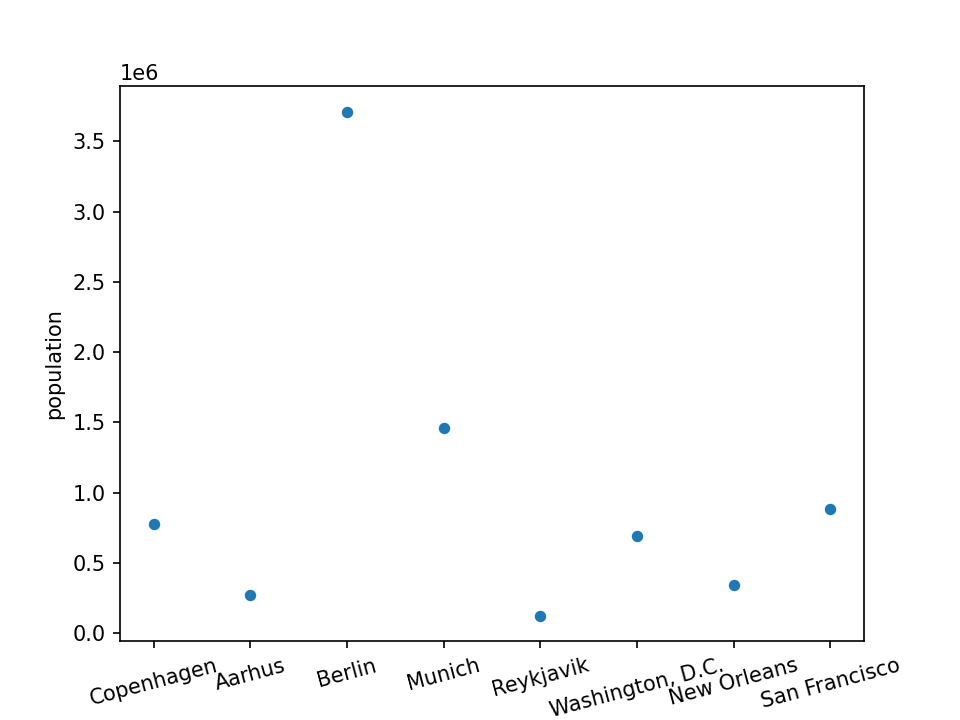

<AxesSubplot:xlabel='name', ylabel='population'>

In [41]:
%matplotlib notebook

cities.plot(kind='scatter', x='name', y='population', rot=15)  # data frames have a .plot attribute

## pandas_datareader and matplotlib integration

<IPython.core.display.Javascript object>


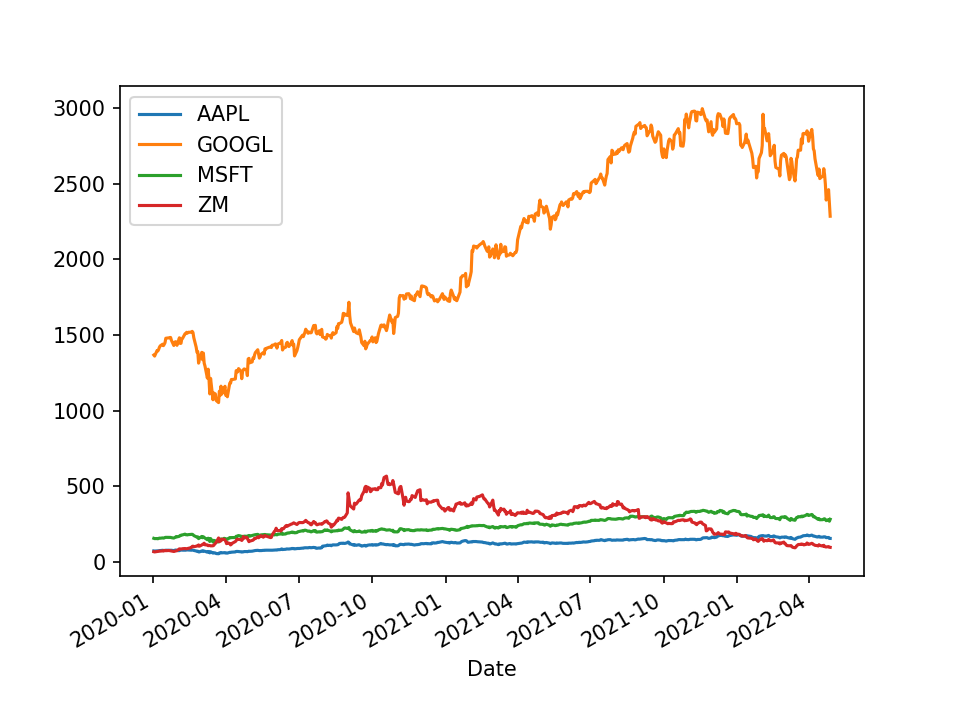

In [42]:
import matplotlib.pyplot as plt
import pandas_datareader  # module giving access to a lot of standard data sources, eg. World Bank

#df = pandas_datareader.data.DataReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], 'stooq')  # ignores start=...

stocks = pandas_datareader.stooq.StooqDailyReader(['AAPL', 'GOOGL', 'MSFT', 'ZM'], start='2020-01-01').read()
stocks['Close'].plot()
plt.legend()
None  # avoid print result of plt.legend() to terminal

## Hierarchical / Multi-level indexing (MultiIndex)

In [43]:
countries.columns  # a standard index

Index(['name', 'population', 'area', 'capital'], dtype='object')

In [44]:
countries.index  # standard row labels

RangeIndex(start=0, stop=4, step=1)

In [45]:
stocks  # notice hierarchical headings

Attributes    Close                               High                     \
Symbols        AAPL    GOOGL    MSFT      ZM      AAPL    GOOGL      MSFT   
Date                                                                        
2022-04-27  156.570  2285.89  283.22   97.62  159.7900  2344.84  290.9700   
2022-04-26  156.800  2373.00  270.22   98.36  162.3400  2450.20  278.3599   
2022-04-25  162.880  2461.48  280.72  102.44  163.1700  2465.55  281.1100   
2022-04-22  161.790  2392.71  274.03  100.17  167.8699  2508.04  283.2000   
2022-04-21  166.420  2496.29  280.81  100.95  171.5300  2601.97  293.3000   
...             ...      ...     ...     ...       ...      ...       ...   
2020-01-08   74.593  1405.04  156.79   72.55   74.9000  1411.85  157.4400   
2020-01-07   73.414  1395.11  154.30   71.90   74.0310  1403.50  156.3800   
2020-01-06   73.757  1397.81  155.74   70.32   73.7970  1398.32  155.8100   
2020-01-03   73.178  1361.52  155.34   67.28   73.9510  1373.75  156.6500   
2020-01-02   73.894  1368.68  157.27   68.72   73.9560  1368.68  157.3700   

Attributes                Low                                  Open            \
Symbols           ZM     AAPL      GOOGL    MSFT        ZM     AAPL     GOOGL   
Date                                                                            
2022-04-27  102.0400  155.380  2254.7301  279.16   97.2970  155.910  2289.385   
2022-04-26  101.6800  156.720  2370.2200  270.00   96.0000  162.250  2445.890   
2022-04-25  103.0900  158.460  2370.2200  270.77   98.9002  161.120  2382.020   
2022-04-22  104.9900  161.500  2378.5000  273.38   99.3000  166.460  2500.000   
2022-04-21  108.4900  165.910  2490.5300  280.06  100.5500  168.910  2585.000   
...              ...      ...        ...     ...       ...      ...       ...   
2020-01-08   73.2900   73.108  1392.6300  154.67   71.0300   73.110  1394.820   
2020-01-07   72.8391   73.190  1391.5600  154.04   69.3700   73.767  1400.460   
2020-01-06   70.4950   72.027  1351.0000  153.25   65.8116   72.277  1351.630   
2020-01-03   68.6800   72.947  1347.3200  154.78   67.1000   73.108  1348.000   
2020-01-02   69.2350   72.623  1346.4900  155.05   68.0200   72.882  1348.410   

Attributes                      Volume                              
Symbols       MSFT       ZM       AAPL    GOOGL      MSFT       ZM  
Date                                                                
2022-04-27  282.10   97.690   88063191  4591029  63477694  3522690  
2022-04-26  277.50  100.750   95623240  3652744  46518445  3786042  
2022-04-25  273.29   99.510   96046376  2306413  35678852  2724189  
2022-04-22  281.68  101.155   84882424  2844186  29405798  3784423  
2022-04-21  288.58  105.200   87227768  1822258  29454587  4395301  
...            ...      ...        ...      ...       ...      ...  
2020-01-08  155.64   71.810  134501064  1766274  28349797  2483510  
2020-01-07  156.03   70.290  113311191  1726456  22345015  7004619  
2020-01-06  153.80   66.630  120493268  2339343  21267639  3152028  
2020-01-03  155.04   67.620  148901629  1170629  21568864  1128483  
2020-01-02  155.49   68.800  137837763  1364265  23113760  1315723  

[585 rows x 20 columns]

In [46]:
stocks.Close  # one top level group of the columns

Symbols,AAPL,GOOGL,MSFT,ZM
Date,,,,
2022-04-27,156.570,2285.89,283.22,97.62
2022-04-26,156.800,2373.00,270.22,98.36
2022-04-25,162.880,2461.48,280.72,102.44
2022-04-22,161.790,2392.71,274.03,100.17
2022-04-21,166.420,2496.29,280.81,100.95
...,...,...,...,...
2020-01-08,74.593,1405.04,156.79,72.55
2020-01-07,73.414,1395.11,154.30,71.90
2020-01-06,73.757,1397.81,155.74,70.32


In [47]:
stocks.Close.GOOGL  # selecting a single column

Date
2022-04-27    2285.89
2022-04-26    2373.00
2022-04-25    2461.48
2022-04-22    2392.71
2022-04-21    2496.29
               ...   
2020-01-08    1405.04
2020-01-07    1395.11
2020-01-06    1397.81
2020-01-03    1361.52
2020-01-02    1368.68
Name: GOOGL, Length: 585, dtype: float64

In [48]:
stocks['Close']['GOOGL']  # same as above

Date
2022-04-27    2285.89
2022-04-26    2373.00
2022-04-25    2461.48
2022-04-22    2392.71
2022-04-21    2496.29
               ...   
2020-01-08    1405.04
2020-01-07    1395.11
2020-01-06    1397.81
2020-01-03    1361.52
2020-01-02    1368.68
Name: GOOGL, Length: 585, dtype: float64

In [49]:
stocks.columns  # has a MultiIndex

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',    'ZM'),
            (  'High',  'AAPL'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',    'ZM'),
            (   'Low',  'AAPL'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',    'ZM'),
            (  'Open',  'AAPL'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',    'ZM'),
            ('Volume',  'AAPL'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',    'ZM')],
           names=['Attributes', 'Symbols'])

In [50]:
stocks.index

DatetimeIndex(['2022-04-27', '2022-04-26', '2022-04-25', '2022-04-22',
               '2022-04-21', '2022-04-20', '2022-04-19', '2022-04-18',
               '2022-04-14', '2022-04-13',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=585, freq=None)

In [51]:
# select all rows and columns with 1st level = all, 2nd level = 'GOOGLE'
stocks.loc[:, pd.IndexSlice[:,'GOOGL']]  

Attributes,Close,High,Low,Open,Volume
Symbols,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-04-27,2285.89,2344.84,2254.7301,2289.385,4591029
2022-04-26,2373.00,2450.20,2370.2200,2445.890,3652744
2022-04-25,2461.48,2465.55,2370.2200,2382.020,2306413
2022-04-22,2392.71,2508.04,2378.5000,2500.000,2844186
2022-04-21,2496.29,2601.97,2490.5300,2585.000,1822258
...,...,...,...,...,...
2020-01-08,1405.04,1411.85,1392.6300,1394.820,1766274
2020-01-07,1395.11,1403.50,1391.5600,1400.460,1726456


## Creating your own multi index

In [52]:
column_index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                          ('two', 'a'), ('two', 'b'), ('two', 'c')])

row_index = pd.MultiIndex.from_tuples((x, y) for x in 'ABC' for y in 'xy')

H = pd.DataFrame(np.arange(30).reshape(6, 5), columns=column_index, index=row_index)
H

one     two        
      a   b   a   b   c
A x   0   1   2   3   4
  y   5   6   7   8   9
B x  10  11  12  13  14
  y  15  16  17  18  19
C x  20  21  22  23  24
  y  25  26  27  28  29

## Reorganizing hierarcical labels - stack and unstack

In [53]:
H

one     two        
      a   b   a   b   c
A x   0   1   2   3   4
  y   5   6   7   8   9
B x  10  11  12  13  14
  y  15  16  17  18  19
C x  20  21  22  23  24
  y  25  26  27  28  29

In [54]:
H.stack(level=0)  # move one level of indexing from columns to last rows (missing columns filled with NaN)

a   b     c
A x one   0   1   NaN
    two   2   3   4.0
  y one   5   6   NaN
    two   7   8   9.0
B x one  10  11   NaN
    two  12  13  14.0
  y one  15  16   NaN
    two  17  18  19.0
C x one  20  21   NaN
    two  22  23  24.0
  y one  25  26   NaN
    two  27  28  29.0

In [55]:
H.stack(level=1)

one  two
A x a   0.0    2
    b   1.0    3
    c   NaN    4
  y a   5.0    7
    b   6.0    8
    c   NaN    9
B x a  10.0   12
    b  11.0   13
    c   NaN   14
  y a  15.0   17
    b  16.0   18
    c   NaN   19
C x a  20.0   22
    b  21.0   23
    c   NaN   24
  y a  25.0   27
    b  26.0   28
    c   NaN   29

In [56]:
H.unstack(level=0)  # and unstack moves row level to column last level

one                    two                              
    a          b           a          b          c        
    A   B   C  A   B   C   A   B   C  A   B   C  A   B   C
x   0  10  20  1  11  21   2  12  22  3  13  23  4  14  24
y   5  15  25  6  16  26   7  17  27  8  18  28  9  19  29

## And there are much more ... see the Pandas documentation